# Explore here

In [1]:
# Your code here
import pandas as pd


In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
total_data.shape

(48895, 16)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Existen un total de 48.895 filas (en este caso, direcciones de Airbnb en NY) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, "Price".

Las variables "last_review" y "reviews_per_month" contienen más de 10K valores nulos (de los 48.895 comentados previamente).
Las variables "host_name" y "name" también cuentan con valores nulos, pero ambos, menos de 20. El resto de variables cuentan siempre con valor.

Los datos cuentan con 10 características numéricas y 6 características categóricas.

In [5]:
total_data.drop("id", axis = 1).duplicated().sum()

np.int64(0)

En este dataframe no hemos encontrado duplicados, por lo que no utilizaremos la función de drop_duplicates().

En el siguiente paso eliminamos las variables que no son necesarias para nuestro EDA.

In [6]:
total_data.drop(["id", "name", "host_id", "host_name", "last_review"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Análisis de variables univariante

### Análisis sobre variables categóricas

In [7]:
# Agrupar por barrio y contar cuántos apartamentos hay en cada uno
top_10_neighbourhoods = total_data['neighbourhood'].value_counts().nlargest(10).index

# Filtrar el dataset para que solo tenga esos 10 barrios
filtered_data = total_data[total_data['neighbourhood'].isin(top_10_neighbourhoods)]

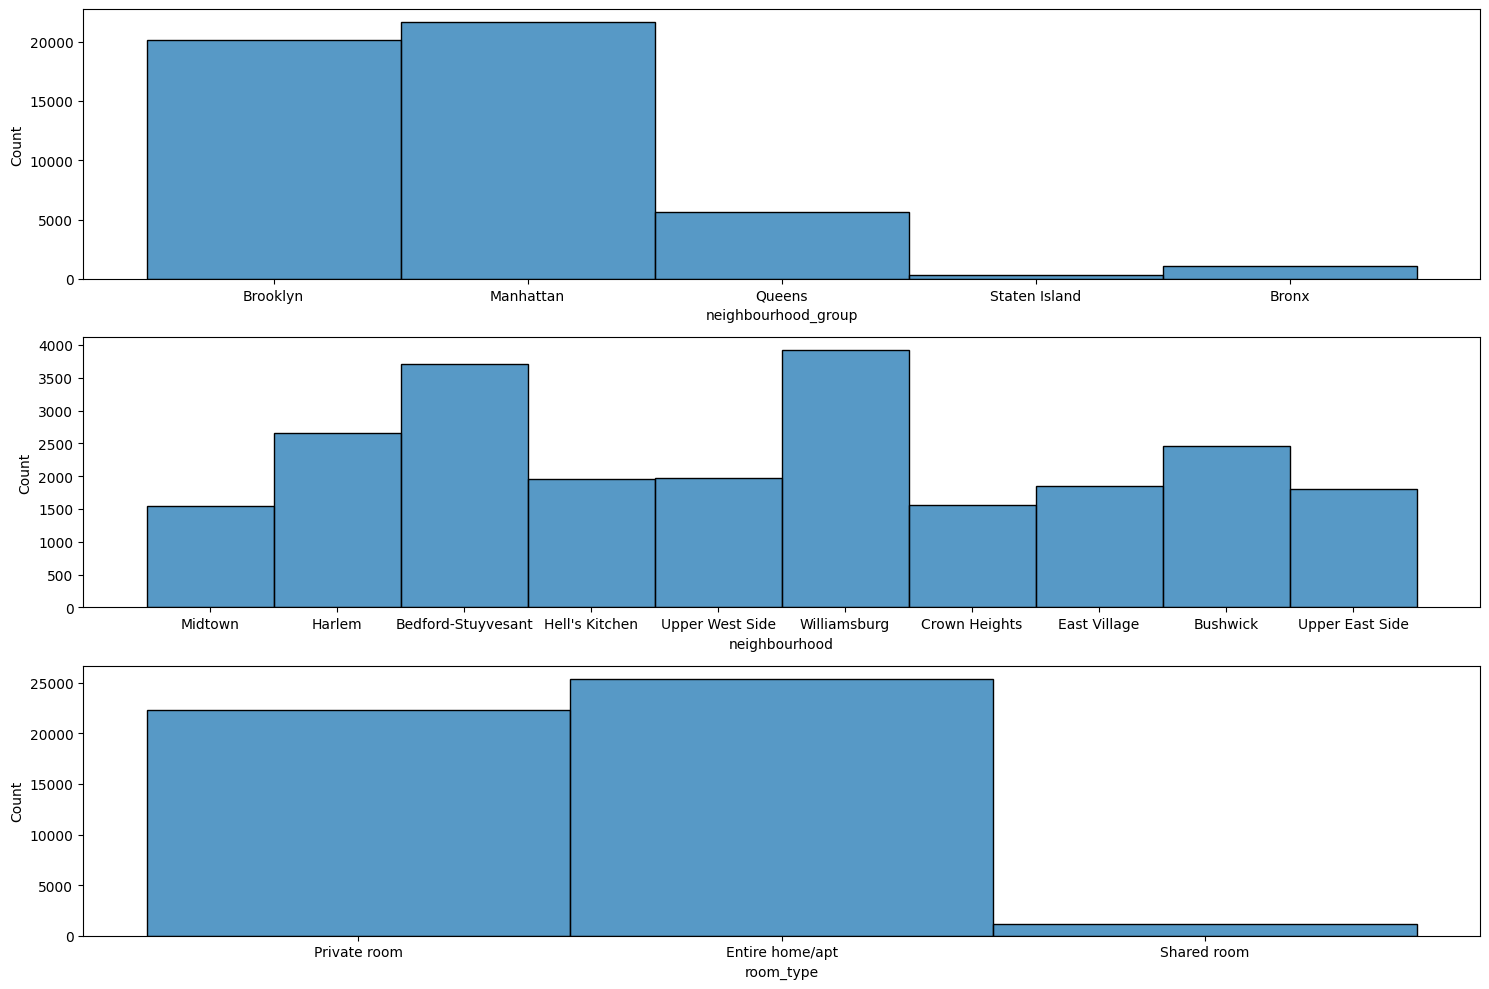

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, figsize = (15, 10))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = filtered_data, x = "neighbourhood")
sns.histplot(ax = axis[2], data = total_data, x = "room_type")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [9]:
# Contar cuántos alojamientos hay por área
counts = total_data['neighbourhood_group'].value_counts()

# Calcular el porcentaje
percentages = (counts / counts.sum()) * 100

print(percentages)

neighbourhood_group
Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: count, dtype: float64


### Análisis categórico

- La mayor concentración de alojamientos disponibles se encuentra en Manhattan y Brooklyn, representando aproximadamente el 85% de la oferta total, siendo Manhattan el área con el mayor número de opciones ligeramente por encima de Brooklyn . Le siguen Queens con un 11%, el Bronx con un 2%, y finalmente Staten Island con menos del 1%.

- El barrio con más alojamientos disponibles es Williamsburg, seguido por Bedford-Stuyvesant, ambos ubicados en Brooklyn. En tercer lugar se encuentra Harlem, en el norte de Manhattan.

- Los apartamentos completos son el tipo de alojamiento más ofertado, seguidos de cerca por las habitaciones privadas. Las habitaciones compartidas, en cambio, tienen una presencia mínima en la oferta total.

### Análisis sobre variables numéricas

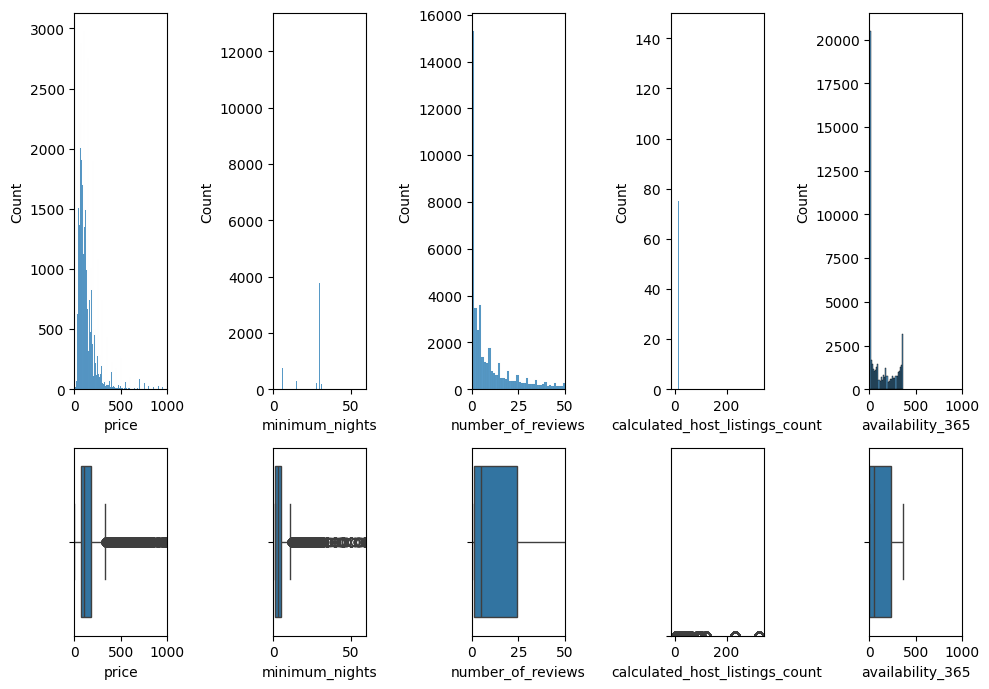

In [10]:
fig, axis = plt.subplots(2, 5, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set_xlim(0, 1000)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price").set_xlim(0, 1000)
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 60)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights").set_xlim(0, 60)
sns.histplot(ax = axis[0, 2], data = total_data, x = "number_of_reviews").set_xlim(0, 50)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "number_of_reviews").set_xlim(0, 50)
sns.histplot(ax = axis[0, 3], data = total_data, x = "calculated_host_listings_count").set_ylim(0, 150)
sns.boxplot(ax = axis[1, 3], data = total_data, x = "calculated_host_listings_count").set_ylim(0, 150)
sns.histplot(ax = axis[0, 4], data = total_data, x = "availability_365").set_xlim(0, 1000)
sns.boxplot(ax = axis[1, 4], data = total_data, x = "availability_365").set_xlim(0, 1000)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Análisis numérico

- Precio por noche: La mayoría de los alojamientos tienen un precio inferior a los 250 dólares por noche. Sin embargo, existen múltiples excepciones, aunque estas disminuyen considerablemente a partir de los 500 dólares, indicando que los precios más altos son mucho menos frecuentes.

- Estancia mínima: La mayoría de los apartamentos requieren una estancia mínima de entre 1 y 5 noches. No obstante, se observa un pico significativo —alrededor de 4.000 alojamientos— que exigen una estancia mínima de al menos 30 noches. A partir de este umbral, apenas hay casos que requieran estancias más largas, lo que sugiere que 30 días es un límite común en alquileres de largo plazo.

- Número de reseñas: La mayor parte de los alojamientos han recibido entre 0 y 25 reseñas, siendo especialmente común el rango de 0 a 4 reseñas. Aquellos con más de 25 reseñas son minoría, lo que indica que la mayoría de los anuncios no acumulan un alto volumen de valoraciones.

- Cantidad de alojamientos por anfitrión: La gran mayoría de los anfitriones gestionan un alojamiento. No obstante, existen algunos casos atípicos de anfitriones que poseen un número significativamente mayor, llegando incluso a 50, 100 o más propiedades. Algunos casos aislados tienen más de 200 propiedades.

- Disponibilidad: Cerca de 20,000 propiedades no están disponibles ningún día del año, lo que sugiere una alta proporción de anuncios inactivos. Aunque unas 3,500 propiedades están activas todo el año, el diagrama de caja muestra que muchas tienen una disponibilidad inferior a 100 días. Esto indica que una parte importante de los alojamientos son esporádicos o estacionales. El 41% de inactividad cuestiona la representatividad del dataset para analizar la oferta real.

# Análisis sobre variables multivariante

### Análisis numérico-numérico

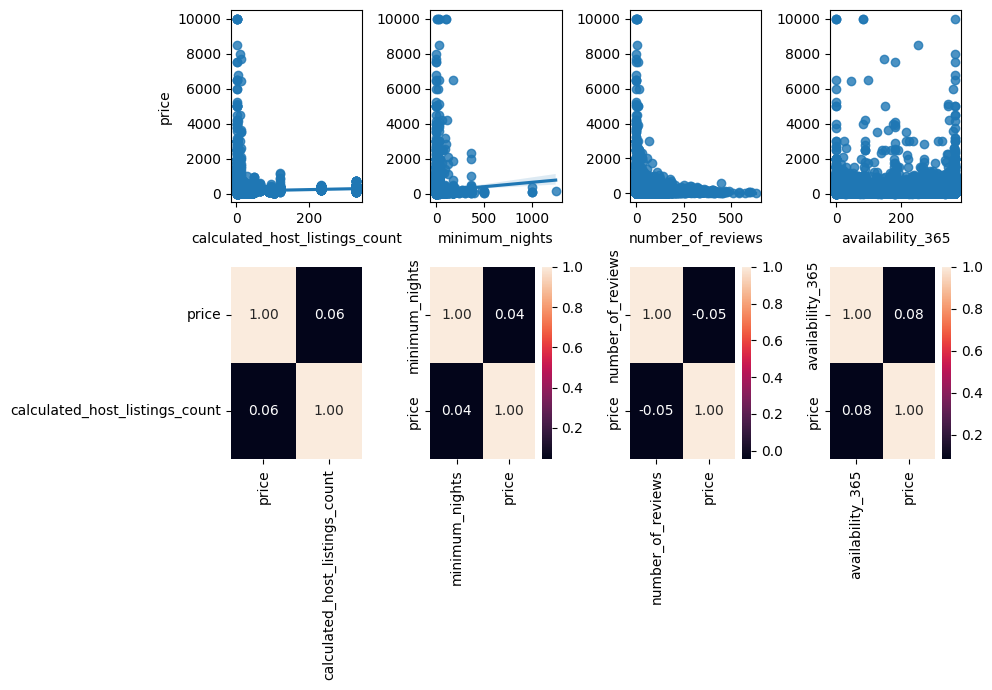

In [11]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "calculated_host_listings_count", y = "price")
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(total_data[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = total_data, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(total_data[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])
sns.regplot(ax = axis[0, 3], data = total_data, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(total_data[["availability_365", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No se observa una relación directa o significativa entre el precio del alojamiento y la cantidad de propiedades que posee el anfitrión. De manera similar, tampoco se identifica una correlación clara entre el precio y el número mínimo de noches requeridas para la estancia.

En cuanto a la relación entre el número de reseñas y el precio, se observa una correlación negativa muy débil, casi nula. Sin embargo, existe una leve tendencia a que los alojamientos con más reseñas tiendan a tener precios más bajos, lo que podría indicar que las opciones más económicas atraen a más huéspedes y, por tanto, acumulan más reseñas.

Respecto a la disponibilidad (medida en días disponibles al año), tampoco se evidencia una relación clara con el precio. Existen propiedades con disponibilidad tanto alta como baja en todos los rangos de precio, lo que sugiere que este factor no influye de manera directa en el precio del alojamiento.

### Análisis categórico-categórico

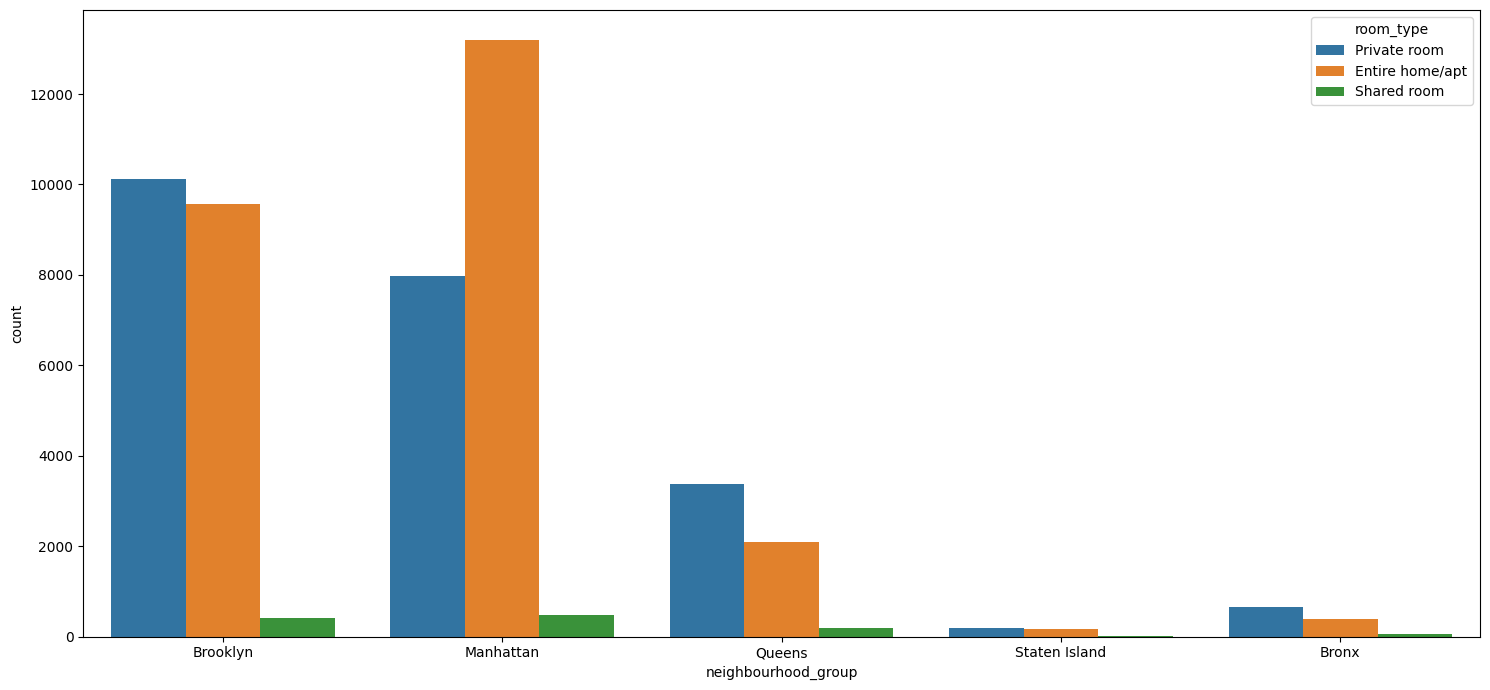

In [12]:
fig, axis = plt.subplots(1, figsize = (15, 7))

sns.countplot(data = total_data, x = "neighbourhood_group", hue = "room_type")

plt.tight_layout()

plt.show()

A partir del gráfico anterior se pueden extraer las siguientes conclusiones:

- Concentración geográfica: La mayoría de los alojamientos disponibles se concentran en Manhattan y Brooklyn, que en conjunto superan el 85% de la oferta total. Les siguen, en menor proporción, Queens, Bronx y Staten Island.

- Tipo de alojamiento por distrito: Manhattan es la única zona donde predominan los apartamentos enteros como tipo de alojamiento principal. En Brooklyn, Queens y Bronx, las habitaciones privadas superan ligeramente a los apartamentos enteros en disponibilidad.

- Habitaciones compartidas: Este tipo de alojamiento representa, con diferencia, la menor proporción en todas las áreas. 

### Combinaciones de la clase con varias predictoras

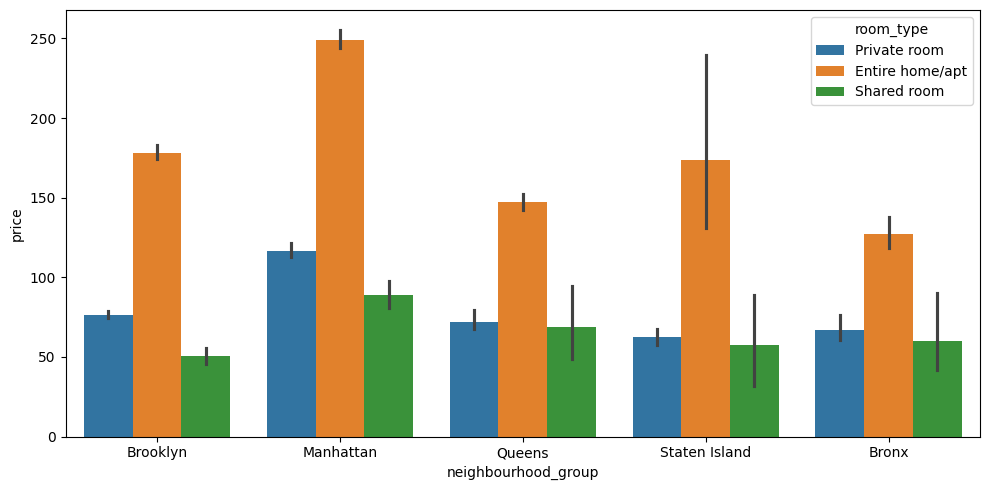

In [13]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)

sns.barplot(data = total_data, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.tight_layout()

plt.show()

Del análisis del gráfico anterior se observa que, independientemente de la zona, los apartamentos completos son los alojamientos más caros, seguidos de las habitaciones privadas y, por último, las habitaciones compartidas.
Curiosamente, en Manhattan y Brooklyn las habitaciones privadas tienen un precio significativamente más alto que las habitaciones compartidas. Sin embargo, en Queens, Staten Island y el Bronx, los precios de ambos tipos de alojamiento están casi a la par, con una diferencia inferior a 10 dólares.


### Análisis de correlaciones

In [14]:
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data[["neighbourhood_group_n", "neighbourhood_group"]]

,neighbourhood_group_n,neighbourhood_group
0,0,Brooklyn
1,1,Manhattan
2,1,Manhattan
3,0,Brooklyn
4,1,Manhattan
...,...,...
48890,0,Brooklyn
48891,0,Brooklyn
48892,1,Manhattan
48893,1,Manhattan


In [15]:
neighbourhood_group_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for index, row in total_data[["neighbourhood_group_n", "neighbourhood_group"]].drop_duplicates().iterrows()}
print(neighbourhood_group_rules)

import json

# Escritura
with open("./neighbourhood_group_rules.json", "w") as f:
  json.dump(neighbourhood_group_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./neighbourhood_group_rules.json", "r") as f:
  neighbourhood_group_rules = json.load(f)
print("2", neighbourhood_group_rules)

total_data["neighbourhood_group_n"] = total_data["neighbourhood_group"].apply(lambda x: neighbourhood_group_rules[x])
total_data

{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}
2 {'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,1


### VARIABLES

Brooklyn = 0

Manhattan = 1

Queens = 2

Staten Island = 3

Bronx = 4

In [16]:
#neighbourhood
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]
total_data[["neighbourhood_n", "neighbourhood"]]

,neighbourhood_n,neighbourhood
0,0,Kensington
1,1,Midtown
2,2,Harlem
3,3,Clinton Hill
4,4,East Harlem
...,...,...
48890,6,Bedford-Stuyvesant
48891,21,Bushwick
48892,2,Harlem
48893,7,Hell's Kitchen


In [17]:
neighbourhood_rules = {row["neighbourhood"]: row["neighbourhood_n"] for index, row in total_data[["neighbourhood_n", "neighbourhood"]].drop_duplicates().iterrows()}
print(neighbourhood_rules)

import json

# Escritura
with open("./neighbourhood_rules.json", "w") as f:
  json.dump(neighbourhood_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./neighbourhood_rules.json", "r") as f:
  neighbourhood_rules = json.load(f)
print("2", neighbourhood_rules)

total_data["neighbourhood_n"] = total_data["neighbourhood"].apply(lambda x: neighbourhood_rules[x])
total_data

{'Kensington': 0, 'Midtown': 1, 'Harlem': 2, 'Clinton Hill': 3, 'East Harlem': 4, 'Murray Hill': 5, 'Bedford-Stuyvesant': 6, "Hell's Kitchen": 7, 'Upper West Side': 8, 'Chinatown': 9, 'South Slope': 10, 'West Village': 11, 'Williamsburg': 12, 'Fort Greene': 13, 'Chelsea': 14, 'Crown Heights': 15, 'Park Slope': 16, 'Windsor Terrace': 17, 'Inwood': 18, 'East Village': 19, 'Greenpoint': 20, 'Bushwick': 21, 'Flatbush': 22, 'Lower East Side': 23, 'Prospect-Lefferts Gardens': 24, 'Long Island City': 25, 'Kips Bay': 26, 'SoHo': 27, 'Upper East Side': 28, 'Prospect Heights': 29, 'Washington Heights': 30, 'Woodside': 31, 'Brooklyn Heights': 32, 'Carroll Gardens': 33, 'Gowanus': 34, 'Flatlands': 35, 'Cobble Hill': 36, 'Flushing': 37, 'Boerum Hill': 38, 'Sunnyside': 39, 'DUMBO': 40, 'St. George': 41, 'Highbridge': 42, 'Financial District': 43, 'Ridgewood': 44, 'Morningside Heights': 45, 'Jamaica': 46, 'Middle Village': 47, 'NoHo': 48, 'Ditmars Steinway': 49, 'Flatiron District': 50, 'Roosevelt Is

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,1,2
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0,3
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,0,6
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,0,21
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,1,2
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,1,7


In [18]:
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data[["room_type_n", "room_type"]]

,room_type_n,room_type
0,0,Private room
1,1,Entire home/apt
2,0,Private room
3,1,Entire home/apt
4,1,Entire home/apt
...,...,...
48890,0,Private room
48891,0,Private room
48892,1,Entire home/apt
48893,2,Shared room


In [19]:
room_type_rules = {row["room_type"]: row["room_type_n"] for index, row in total_data[["room_type_n", "room_type"]].drop_duplicates().iterrows()}
print(room_type_rules)

import json

# Escritura
with open("./room_type_rules.json", "w") as f:
  json.dump(room_type_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./room_type_rules.json", "r") as f:
  room_type_rules = json.load(f)
print("2", room_type_rules)

total_data["room_type_n"] = total_data["room_type"].apply(lambda x: room_type_rules[x])
total_data

{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}
2 {'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,1,2,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0,3,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,0,6,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,0,21,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,1,2,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,1,7,2


### VARIABLES

Private room = 0

Entire home/apt = 1

Shared room = 2

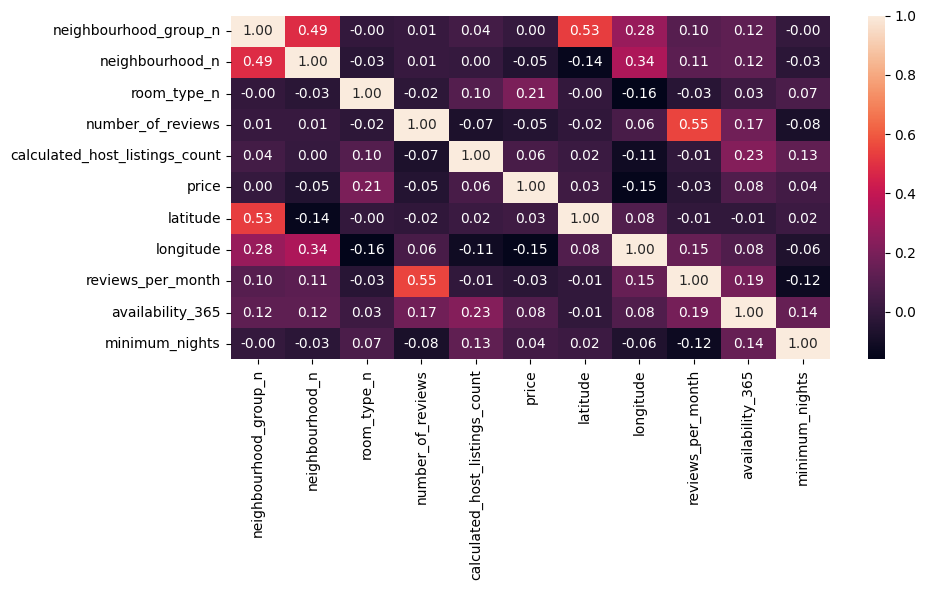

In [20]:
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "number_of_reviews", "calculated_host_listings_count", "price", "latitude", "longitude", "reviews_per_month", "availability_365", "minimum_nights"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

CONCLUSIONES

En el gráfico anterior se observa una relación clara entre el precio y el tipo de alojamiento, lo cual es esperable, ya que —como se ha evidenciado en análisis previos— los apartamentos completos suelen ser más caros que las habitaciones privadas o compartidas.

También se aprecia una relación entre el tipo de alojamiento y el número de propiedades gestionadas por un mismo anfitrión. Sería pertinente profundizar en qué tipo de alojamientos ofrecen: si se trata de habitaciones dentro de una vivienda compartida o de apartamentos completos, ya que esto podría influir tanto en la oferta como en los precios.

Por otro lado, se identifican vínculos entre la longitud y latitud con las áreas geográficas y los barrios, así como entre las áreas y los propios barrios, lo cual resulta coherente al tratarse de variables espaciales.

Además, se observa cierta relación entre el número de reseñas y la disponibilidad durante los 365 días del año. Es más probable que un alojamiento con alta disponibilidad reciba más reseñas, debido a su mayor frecuencia de uso. De igual forma, se detecta una correlación entre la cantidad de alojamientos por anfitrión y su disponibilidad anual, lo que podría indicar una actividad más profesional por parte de ciertos propietarios.


### Análisis numérico-categórico (completo)

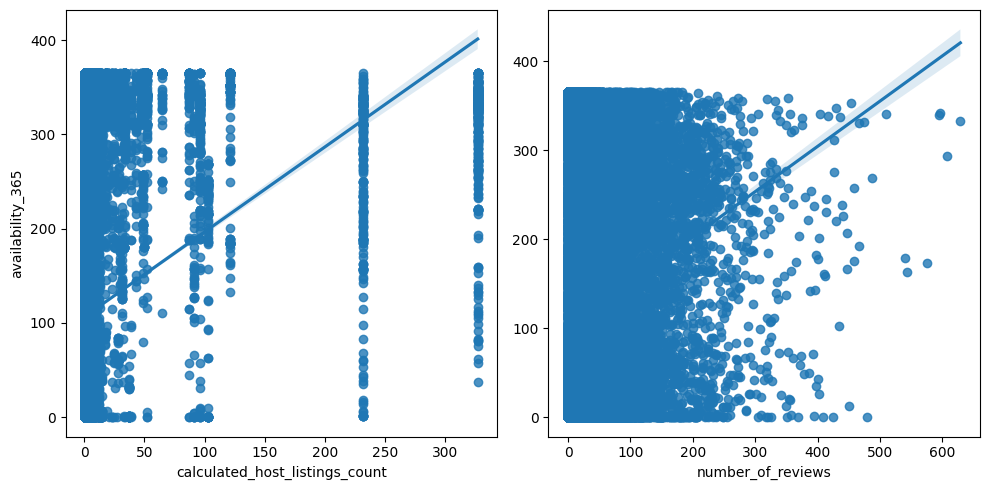

In [21]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = total_data, x = "calculated_host_listings_count", y = "availability_365")
sns.regplot(ax = axis[1], data = total_data, x = "number_of_reviews", y = "availability_365").set(ylabel = None)

plt.tight_layout()

plt.show()


CONCLUSIONES

En el primer gráfico, aunque hay una tendencia positiva, la relación no es lineal ni fuerte para la mayoría de anfitriones. Solo algunos grandes operadores, dueños de muchísimos alojamientos, muestran alta disponibilidad constante. En el caso del anfitrión con más de 300 alojamientos, todos los puntos del gráfico aparecen por encima de 50 días de disponibilidad, lo que indica que ninguna de sus propiedades está disponible menos de 50 días al año, al menos dentro del conjunto de datos mostrado.

En el segundo gráfico, existe una relación más clara entre disponibilidad y número de reseñas. Tiene sentido: un alojamiento más disponible tiene más oportunidad de ser reservado y por tanto recibir más reseñas. Por ejemplo, los que superan las 600 reseñas están disponibles casi 300 días al año. 

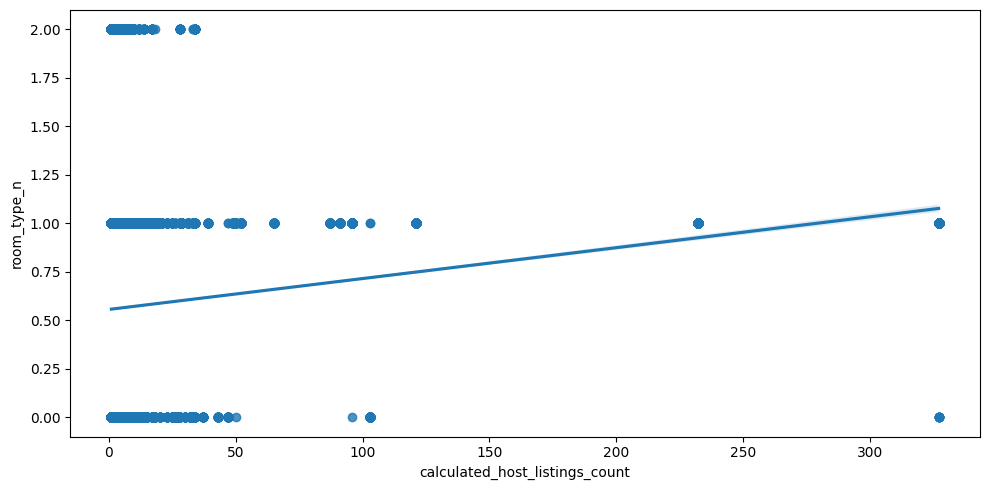

In [22]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)

sns.regplot(data = total_data, x = "calculated_host_listings_count", y = "room_type_n")

plt.tight_layout()

plt.show()

A medida que un anfitrión tiene más anuncios, es más probable que ofrezca un apartamento/casa completa (1) que una habitación privada (0) o compartida (2). Los anfitriones que ofrecen habitaciones compartidas tienen menos de 50 propiedades.

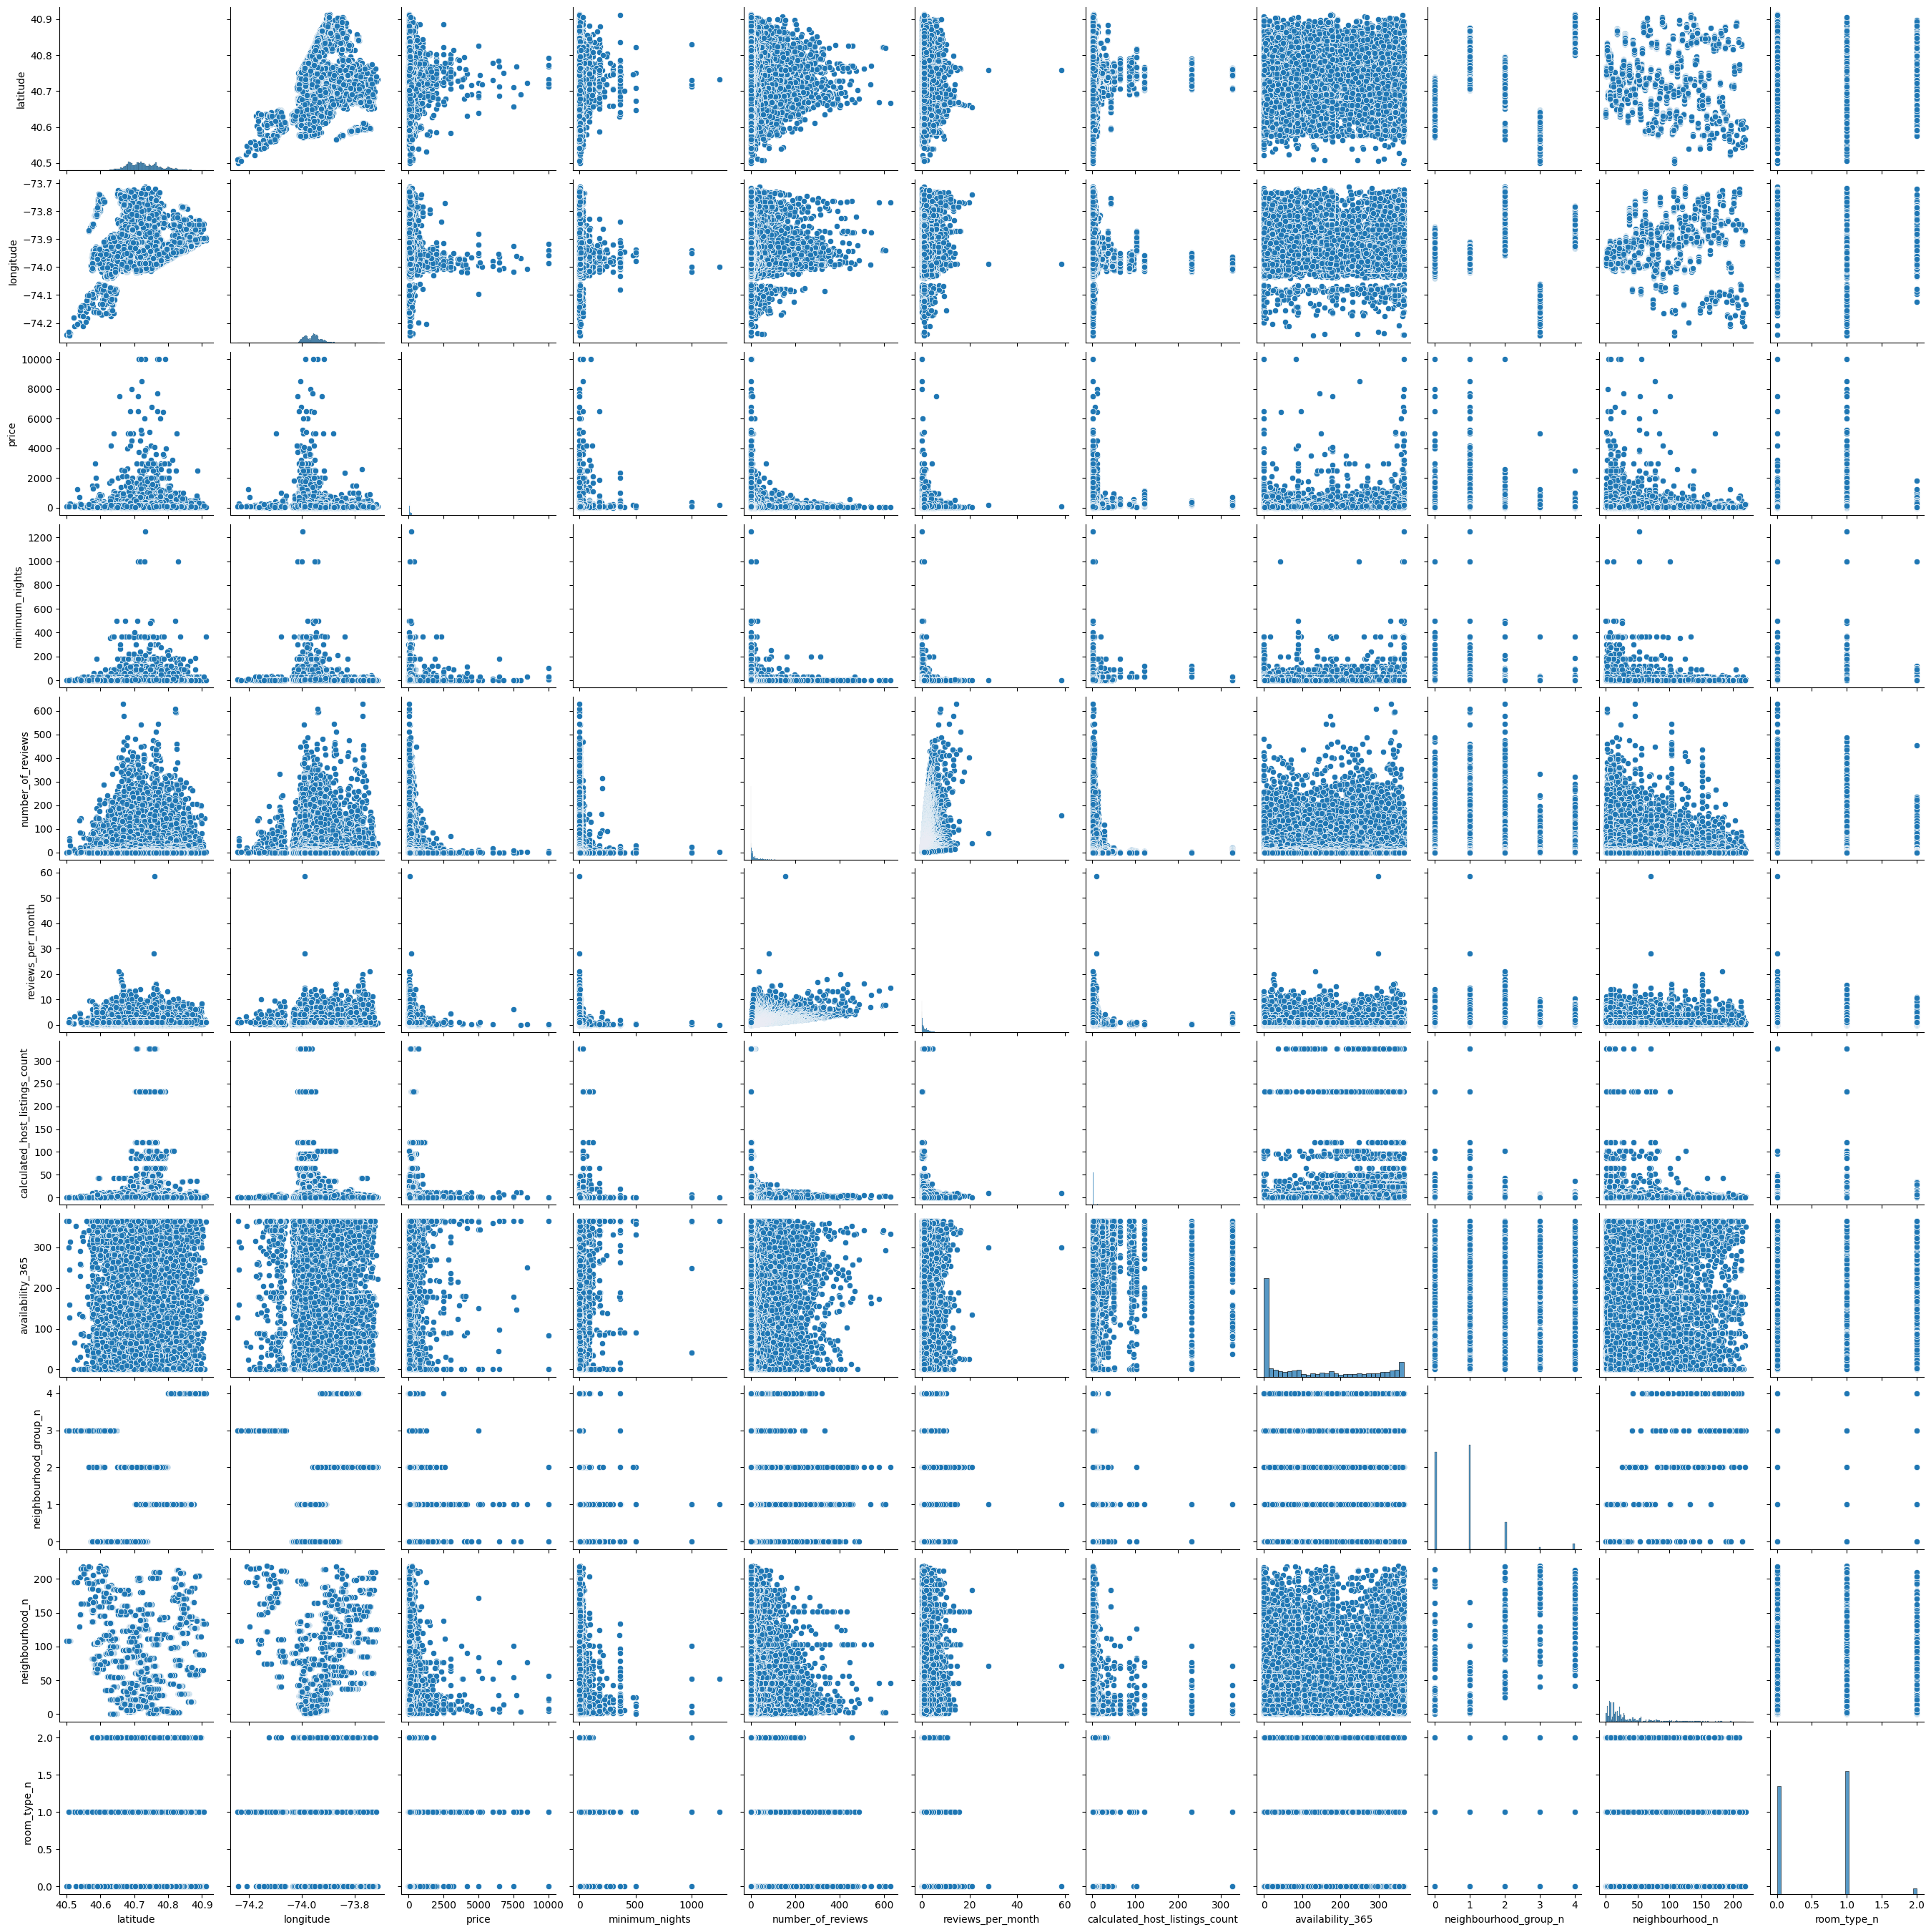

In [23]:
sns.pairplot(data = total_data)

## Ingeniería de características

In [24]:
total_data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.786911,29.888782,0.567113
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.844386,34.676634,0.541249
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,7.500000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,19.000000,1.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,37.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,4.000000,220.000000,2.000000


En la mayoría de las columnas o variables del conjunto de datos se observa una gran cantidad de valores atípicos, con excepción de las columnas de latitud y longitud, disponibilidad, zona o neighbourhood_group y tipo de alojamiento o room_type.

En la columna price, el valor mínimo es 0, mientras que el percentil 25 se sitúa en 69. Esto sugiere que el valor cero podría ser un error, ya que es poco probable que se ofrezcan alojamientos de forma gratuita. Además, el percentil 75 es de 175, pero el valor máximo alcanza los 10,000. Esto podría deberse a la presencia de alojamientos de lujo o muy específicos con precios excepcionalmente altos, lo que no necesariamente implica un error.

En cuanto a la columna minimum_nights, el percentil 75 es 5, pero el valor máximo es 1,250. Este valor parece excesivo y posiblemente sea un error de transcripción, ya que implicaría una estancia mínima de más de tres años, algo poco realista.

Respecto al número de reseñas, el percentil 75 es de 24, mientras que el valor máximo llega a 629. Esto indica que, aunque la mayoría de los alojamientos tienen pocas reseñas, existen algunos pocos que acumulan una cantidad considerable. Lo mismo ocurre con la columna reseñas por mes (reviews_per_month), cuyo percentil 75 es 2, mientras que el máximo es 58.5.

En la misma línea, se observa que en la columna calculated_host_listings_count (número de alojamientos por anfitrión), el percentil 75 es 2, mientras que el valor máximo alcanza 327. Esto sugiere que es poco común que un anfitrión tenga más de dos alojamientos, aunque existen casos excepcionales con una gran cantidad de propiedades.


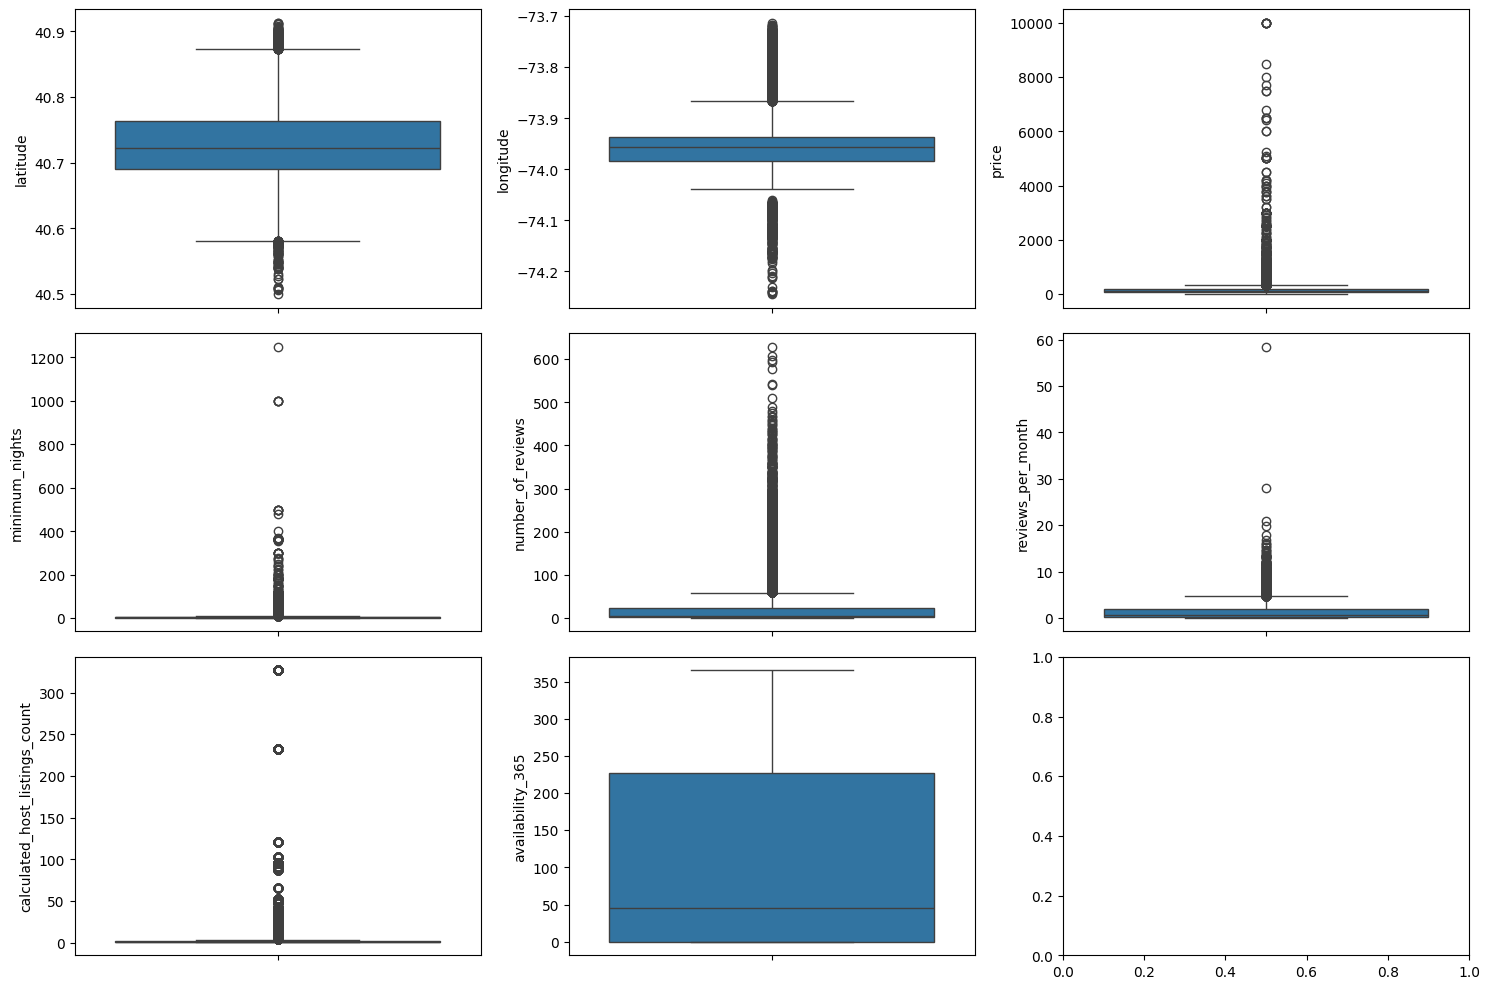

In [25]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "latitude")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "longitude")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "reviews_per_month")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "availability_365")


plt.tight_layout()

plt.show()

In [26]:
numerical_columns =["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

for column in numerical_columns:
    fare_stats = total_data[column].describe()
    fare_iqr = fare_stats["75%"] - fare_stats["25%"]
    upper_limit = fare_stats["75%"] + 1.5 * fare_iqr
    lower_limit = fare_stats["25%"] - 1.5 * fare_iqr
    if lower_limit < 0:
        lower_limit = 0

        print(f"En la columna {column}: Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

En la columna price: Los límites superior e inferior para la búsqueda de outliers son 334.0 y 0, con un rango intercuartílico de 106.0
En la columna minimum_nights: Los límites superior e inferior para la búsqueda de outliers son 11.0 y 0, con un rango intercuartílico de 4.0
En la columna number_of_reviews: Los límites superior e inferior para la búsqueda de outliers son 58.5 y 0, con un rango intercuartílico de 23.0
En la columna reviews_per_month: Los límites superior e inferior para la búsqueda de outliers son 4.77 y 0, con un rango intercuartílico de 1.83
En la columna calculated_host_listings_count: Los límites superior e inferior para la búsqueda de outliers son 3.5 y 0, con un rango intercuartílico de 1.0
En la columna availability_365: Los límites superior e inferior para la búsqueda de outliers son 567.5 y 0, con un rango intercuartílico de 227.0


Para el desarrollo del modelo, hemos decidido trabajar con dos conjuntos de datos: uno que incluye todos los outliers y otro en el que se han eliminado los outliers de las siguientes columnas:

- "minimum_nights"

- "number_of_reviews"

- "reviews_per_month"

- "calculated_host_listings_count"

Optamos por no eliminar los outliers de la variable objetivo "price", ya que consideramos que hacerlo podría distorsionar el comportamiento del modelo.

En cuanto a la variable "calculated_host_listings_count", hemos decidido eliminar sus valores atípicos, dado que en el análisis multivariante detectamos que su correlación con la variable objetivo "price" es prácticamente nula. 

In [27]:
# TENEMOS QUE GUARDARNOS TODOS LOS DATASETS, ESTO SIGNIFICA:

total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'minimum_nights': [1, np.float64(11.0)],
 'number_of_reviews': [0, np.float64(58.5)],
 'reviews_per_month': [0.01, np.float64(4.765000000000001)],
 'calculated_host_listings_count': [1, np.float64(3.5)]}

In [28]:
total_data_CON_outliers

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,1,2,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0,3,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,0,6,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,0,21,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,1,2,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,1,7,2


In [29]:
total_data_SIN_outliers

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1.0,9.0,0.210,3.5,365,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1.0,45.0,0.380,2.0,355,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3.0,0.0,4.765,1.0,365,1,2,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1.0,58.5,4.640,1.0,194,0,3,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10.0,9.0,0.100,1.0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2.0,0.0,4.765,2.0,9,0,6,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4.0,0.0,4.765,2.0,36,0,21,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10.0,0.0,4.765,1.0,27,1,2,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1.0,0.0,4.765,3.5,2,1,7,2


### Análisis de valores faltantes

In [30]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
neighbourhood                         0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
neighbourhood_group_n                 0
neighbourhood_n                       0
room_type_n                           0
dtype: int64

In [31]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
neighbourhood_n                   0
room_type_n                       0
dtype: int64

In [32]:
total_data_CON_outliers["reviews_per_month"].fillna(total_data_CON_outliers["reviews_per_month"].mean(), inplace = True)

total_data_CON_outliers.isnull().sum()

/tmp/ipykernel_3451/3150053769.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_data_CON_outliers["reviews_per_month"].fillna(total_data_CON_outliers["reviews_per_month"].mean(), inplace = True)


neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
neighbourhood_n                   0
room_type_n                       0
dtype: int64

Hemos descubierto que hay 10.052 valores faltantes en la columna "reviews_per_month", un 20.5% de sus valores son nulos, en este caso hemos decidido sustituir esos valores faltantes por la media de la columna.

### Escalado de valores

Antes de escalar los valores, debemos dividir convenientemente el conjunto en train y test, lo que prevendrá que los datos de entrenamiento no se contaminen con los datos del conjunto de pruebas.

In [33]:
from sklearn.model_selection import train_test_split

num_variables = ["latitude", "longitude", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "neighbourhood_group_n","neighbourhood_n", "room_type_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_CON = total_data_CON_outliers.drop("price", axis = 1)[num_variables]
y = total_data_CON_outliers["price"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("price", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
32645,40.71577,-73.95530,3,11,0.870000,1,1,0,12,1
23615,40.84917,-73.94048,2,2,0.160000,1,0,1,30,0
31183,40.68993,-73.95947,2,0,1.373221,2,0,0,6,0
29260,40.68427,-73.93118,3,87,4.910000,1,267,0,6,1
7275,40.74705,-73.89564,5,13,0.250000,1,0,2,31,0


### Normalización

In [34]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
32645,-0.241172,-0.064946,-0.193025,-0.277198,-0.338511,-0.186570,-0.852862,-0.931915,-0.514100,0.798949
23615,2.204077,0.257030,-0.239596,-0.479451,-0.810745,-0.186570,-0.860447,0.256169,0.005517,-1.050482
31183,-0.714824,-0.155542,-0.239596,-0.524396,-0.003809,-0.156424,-0.860447,-0.931915,-0.687306,-1.050482
29260,-0.818573,0.459080,-0.193025,1.430714,2.348565,-0.186570,1.164663,-0.931915,-0.687306,0.798949
7275,0.332197,1.231213,-0.099884,-0.232253,-0.750884,-0.186570,-0.860447,1.444253,0.034385,-1.050482


### Escalado Mínimo-Máximo

In [35]:
from sklearn.preprocessing import MinMaxScaler

### ESCALAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

#del X_train_con_outliers_scal

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
32645,0.522612,0.542691,0.001601,0.017488,0.014703,0.000000,0.002740,0.00,0.054545,0.5
23615,0.845404,0.570660,0.000801,0.003180,0.002565,0.000000,0.000000,0.25,0.136364,0.0
31183,0.460087,0.534821,0.000801,0.000000,0.023307,0.003067,0.000000,0.00,0.027273,0.0
29260,0.446391,0.588212,0.001601,0.138315,0.083775,0.000000,0.731507,0.00,0.027273,0.5
7275,0.598301,0.655286,0.003203,0.020668,0.004103,0.000000,0.000000,0.50,0.140909,0.0


In [37]:
X_train_con_outliers.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/E-Pablos-ML-EDA/data/processed/y_test.xlsx", index = False)

with open("/workspaces/E-Pablos-ML-EDA/models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("/workspaces/E-Pablos-ML-EDA/models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("/workspaces/E-Pablos-ML-EDA/models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("/workspaces/E-Pablos-ML-EDA/models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

En los pasos anteriores, hemos verificado que todas nuestras variables son numéricas. Además, hemos guardado los distintos conjuntos de datos —tanto de entrenamiento como de prueba, con y sin outliers— en archivos Excel dentro de la carpeta data del notebook. También hemos almacenado la ruta de apertura correspondiente en la carpeta models.